In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint
import matplotlib.pyplot as plt
from scipy.stats import t
from pandas.api.types import CategoricalDtype
from matplotlib.transforms import Affine2D

In [2]:
#in the first part we see the effects of the crowds on football game
#I calcluated the odds of the home team winning at home and away and plot a graph to shows for it
#in the study there are 2 types of matches recorded friendly and offical
#I tried to see the effects of the fans on teams with different levels
# I used egypt and scotland as the lower level teams and france and england for the elite level teams 

In [3]:
df=pd.read_csv("results.csv")

In [4]:
#I calculated to see if the home team won or lost the match
x=df['home_score']-df['away_score']

In [5]:
conditions = [
 (x<0),
 (x>0),
 (x==0)
 ]
values= ['win','lose','draw']

In [6]:
df['result'] = np.select(conditions, values)
df.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,lose
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,lose


In [7]:
#I started with egypt and divided the matches to friendly and official
dfegy=df[df['country']=='Egypt']
conditions = [
 (dfegy['tournament']=='Friendly'),
 (dfegy['tournament']!='Friendly')
 ]
values=['Friendly','official']

In [8]:
#I then calculated the confidence interval for friendly wins (aplha= 95%)
dfegy['typematch'] = np.select(conditions, values)
dfegy['typematch'].value_counts()
x=pd.crosstab(dfegy['typematch'],dfegy['result'],margins=True)
x=np.array(x)
CI_egywin_friendly=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_egywin_friendly

<ipython-input-8-4b3e26fc617f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfegy['typematch'] = np.select(conditions, values)


(0.1856528084886489, 0.3115847605721246)

In [9]:
#i then calculated the condfidence interval for offiical matches
CI_egywin_official=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(
1-.95))
CI_egywin_official

(0.1550517855722795, 0.2608774179675435)

In [10]:
#I then put the data in a table with the labels upperbound(ub) and lowerbound(lb)
ci_egywin = {}
ci_egywin['Typematch'] = ['Friendly','Official']
ci_egywin['lb'] = [CI_egywin_friendly[0],CI_egywin_official[0]]
ci_egywin['ub'] = [CI_egywin_friendly[1],CI_egywin_official[1]]
df_ci= pd.DataFrame(ci_egywin)
df_ci

,Typematch,lb,ub
0,Friendly,0.185653,0.311585
1,Official,0.155052,0.260877


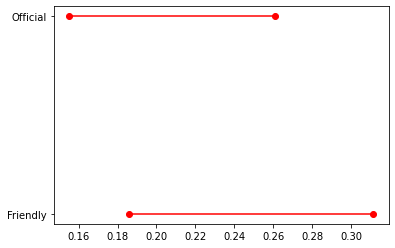

In [11]:
#the graph below shows the confidence interval in general(both home and away games) of the egyptain team
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
 plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Typematch']))

In [12]:
#i then made table to calculate the games where the egypt team is at home
dfegy['home']=(dfegy['home_team']=='Egypt')
x=pd.crosstab(dfegy['home'],dfegy['result'],margins=True)
x

<ipython-input-12-dad04ae3a7c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfegy['home']=(dfegy['home_team']=='Egypt')


result,draw,lose,win,All
home,,,,
False,33,67,49,149
True,44,171,43,258
All,77,238,92,407


In [13]:
#i calculated the confidence interval of wins at home
x=np.array(x)
CI_egywin_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_egywin_home

(0.12119174183927744, 0.21214159149405587)

In [14]:
# I calculated the confidence interval of winning away
CI_egywin_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_egywin_away

(0.25342513144684364, 0.40429298935852553)

In [15]:
ci_egywin = {}
ci_egywin['home'] = ['Yes','No']
ci_egywin['lb'] = [CI_egywin_home[0],CI_egywin_away[0]]
ci_egywin['ub'] = [CI_egywin_home[1],CI_egywin_away[1]]
df_ci= pd.DataFrame(ci_egywin)
df_ci

,home,lb,ub
0,Yes,0.121192,0.212142
1,No,0.253425,0.404293


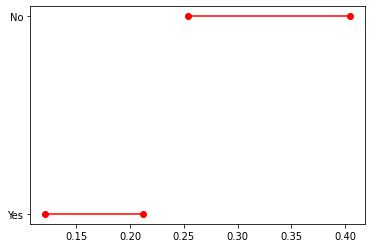

In [16]:
# we see that egypt is more likely to win at away games
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
 plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

In [17]:
# i repeated the same thing with scotland
s=(df['country']=='Scotland').value_counts()
s

In [18]:
dfscot=df[df['country']=='Scotland']
conditions = [
 (dfscot['tournament']=='Friendly'),
 (dfscot['tournament']!='Friendly')
 ]
values=['Friendly','official']

In [19]:
dfscot['typematch'] = np.select(conditions, values)
dfscot['typematch'].value_counts()
x=pd.crosstab(dfscot['typematch'],dfscot['result'],margins=True)
x=np.array(x)
CI_scotwin_friendly=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_scotwin_friendly

<ipython-input-19-d54ebb63f583>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfscot['typematch'] = np.select(conditions, values)


(0.22953573779233233, 0.4059782808992564)

In [20]:
CI_scotwin_official=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_scotwin_official

(0.1440669471299619, 0.2330374299744152)

In [21]:
ci_scotwin = {}
ci_scotwin['Typematch'] = ['Friendly','Official']
ci_scotwin['lb'] = [CI_scotwin_friendly[0],CI_scotwin_official[0]]
ci_scotwin['ub'] = [CI_scotwin_friendly[1],CI_scotwin_official[1]]
df_ci= pd.DataFrame(ci_scotwin)
df_ci

,Typematch,lb,ub
0,Friendly,0.229536,0.405978
1,Official,0.144067,0.233037


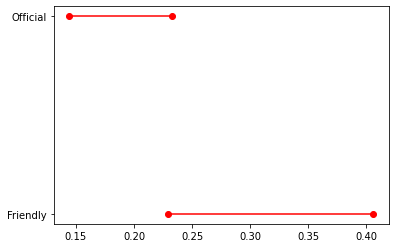

In [22]:
# Scotland is more likely to win friendly games
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
 plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Typematch']))

In [23]:
dfscot['home']=(dfscot['home_team']=='Scotland')
x=pd.crosstab(dfscot['home'],dfscot['result'],margins=True)
x

<ipython-input-23-2be3ed375790>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfscot['home']=(dfscot['home_team']=='Scotland')


result,draw,lose,win,All
home,,,,
False,6,14,8,28
True,77,217,82,376
All,83,231,90,404


In [24]:
x=np.array(x)
CI_scotwin_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_scotwin_home

(0.17634563783879345, 0.25982457492716404)

In [25]:
CI_scotwin_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_scotwin_away

(0.11838535517233528, 0.4530432162562361)

In [26]:
ci_scotwin = {}
ci_scotwin['home'] = ['Yes','No']
ci_scotwin['lb'] = [CI_scotwin_home[0],CI_scotwin_away[0]]
ci_scotwin['ub'] = [CI_scotwin_home[1],CI_scotwin_away[1]]
df_ci= pd.DataFrame(ci_scotwin)
df_ci

,home,lb,ub
0,Yes,0.176346,0.259825
1,No,0.118385,0.453043


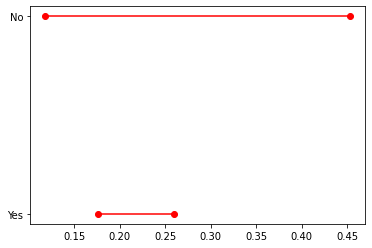

In [27]:
# for the away games it is hard to predict the results as the confidence interval is really wide
# however for home games they are not very good
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
 plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

In [28]:
(df['country']=='France').value_counts()

In [29]:
dffra=df[df['country']=='France']
conditions = [
 (dffra['tournament']=='Friendly'),
 (dffra['tournament']!='Friendly')
 ]
values=['Friendly','official']

In [30]:
dffra['typematch'] = np.select(conditions, values)
dffra['typematch'].value_counts()
x=pd.crosstab(dffra['typematch'],dffra['result'],margins=True)
x=np.array(x)
CI_frawin_friendly=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_frawin_friendly

<ipython-input-30-711aa00e2932>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffra['typematch'] = np.select(conditions, values)


(0.2376654895121334, 0.3185977801269324)

In [31]:
CI_frawin_official=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(
1-.95))
CI_frawin_official

(0.18892148425887595, 0.27793730536648426)

In [32]:
ci_frawin = {}
ci_frawin['Typematch'] = ['Friendly','Official']
ci_frawin['lb'] = [CI_frawin_friendly[0],CI_frawin_official[0]]
ci_frawin['ub'] = [CI_frawin_friendly[1],CI_frawin_official[1]]
df_ci= pd.DataFrame(ci_frawin)
df_ci

,Typematch,lb,ub
0,Friendly,0.237665,0.318598
1,Official,0.188921,0.277937


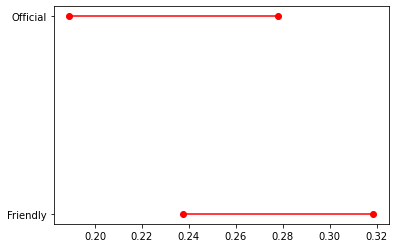

In [33]:
# france also seem to be winning more in friendlies
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
 plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Typematch']))

In [34]:
dffra['home']=(dffra['home_team']=='France')
x=pd.crosstab(dffra['home'],dffra['result'],margins=True)
x

<ipython-input-34-b2357d1a8412>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffra['home']=(dffra['home_team']=='France')


result,draw,lose,win,All
home,,,,
False,100,157,118,375
True,89,260,94,443
All,189,417,212,818


In [35]:
x=np.array(x)
CI_frawin_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_frawin_home

(0.17411643713822142, 0.2502627953674219)

In [36]:
CI_frawin_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_frawin_away

(0.2676654873825878, 0.3616678459507455)

In [37]:
ci_frawin = {}
ci_frawin['home'] = ['Yes','No']
ci_frawin['lb'] = [CI_frawin_home[0],CI_frawin_away[0]]
ci_frawin['ub'] = [CI_frawin_home[1],CI_frawin_away[1]]
df_ci= pd.DataFrame(ci_frawin)
df_ci

,home,lb,ub
0,Yes,0.174116,0.250263
1,No,0.267665,0.361668


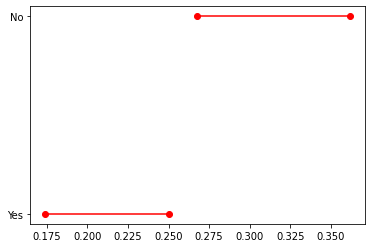

In [38]:
#france are winning more away game
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
 plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

In [39]:
(df['country']=='England').value_counts()

In [40]:
dfeng=df[df['country']=='England']
conditions = [
 (dfeng['tournament']=='Friendly'),
 (dfeng['tournament']!='Friendly')
 ]
values=['Friendly','official']


In [41]:
dfeng['typematch'] = np.select(conditions, values)
dfeng['typematch'].value_counts()
x=pd.crosstab(dfeng['typematch'],dfeng['result'],margins=True)
x=np.array(x)
CI_engwin_friendly=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_engwin_friendly

<ipython-input-41-f33be20f9540>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfeng['typematch'] = np.select(conditions, values)


(0.15619778812633506, 0.24939661746807051)

In [42]:
CI_engwin_official=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(
1-.95))
CI_engwin_official

(0.1661205581281346, 0.24223211008532247)

In [43]:
ci_engwin = {}
ci_engwin['Typematch'] = ['Friendly','Official']
ci_engwin['lb'] = [CI_engwin_friendly[0],CI_engwin_official[0]]
ci_engwin['ub'] = [CI_engwin_friendly[1],CI_engwin_official[1]]
df_ci= pd.DataFrame(ci_engwin)
df_ci

,Typematch,lb,ub
0,Friendly,0.156198,0.249397
1,Official,0.166121,0.242232


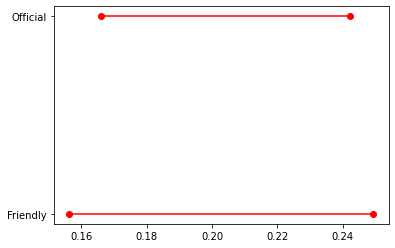

In [44]:
#wide reange of results for friendlies
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
 plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Typematch']))

In [45]:
dfeng['home']=(dfeng['home_team']=='England')
x=pd.crosstab(dfeng['home'],dfeng['result'],margins=True)
x

<ipython-input-45-30b3aa58419f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfeng['home']=(dfeng['home_team']=='England')


result,draw,lose,win,All
home,,,,
False,55,115,83,253
True,101,300,63,464
All,156,415,146,717


In [46]:
x=np.array(x)
CI_engwin_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_engwin_home


(0.10460752863595074, 0.1669441955019803)

In [47]:
CI_engwin_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_engwin_away

(0.27020958414722984, 0.3859168980662089)

In [48]:
ci_engwin = {}
ci_engwin['home'] = ['Yes','No']
ci_engwin['lb'] = [CI_engwin_home[0],CI_engwin_away[0]]
ci_engwin['ub'] = [CI_engwin_home[1],CI_engwin_away[1]]
df_ci= pd.DataFrame(ci_engwin)
df_ci

,home,lb,ub
0,Yes,0.104608,0.166944
1,No,0.270210,0.385917


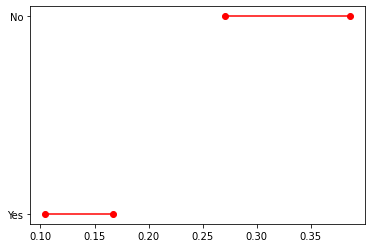

In [49]:
#more likely to win away than home games
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
 plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

In [50]:
# to conclude we find that more stronger teams like england and france have a better chance of winning away games.

In [51]:
#part 2
#in this part i looked at the overall number of covid cases in the world per month
# then i started comparing 1st,2nd and third worlds on how sprea the virus is spread in the years 2020 and 2021
# I used egypt for the third world, china for the 2md world, and the United kingdom for the first world

In [52]:
df=pd.read_csv('covid_data.csv',encoding='latin-1')

In [53]:
cats=['Jan', 'Feb',
'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['month'] = df['month'].astype(cat_type)

In [54]:
dfegy=df[df['country']=='Egypt']
stats=dfegy.groupby("month").agg({"dcases": [np.mean, np.std,
np.size]})
stats=pd.DataFrame(stats)

In [55]:
stats.columns=['mean','std','size']
stats.columns

Index(['mean', 'std', 'size'], dtype='object')

In [56]:
#i am calculating the lower confidence interval
def get_ci_lb(x, alpha=0.05):
 sample_s=np.std(x)
 sample_mean=np.mean(x)
 sample_size=len(x)
 margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
 return sample_mean - margin_of_error

In [57]:
x=dfegy['dcases']
get_ci_lb(x)

529.7945911276134

In [58]:
#i am calculating the upper confidence interval
def get_ci_ub(x, alpha=0.05):
 sample_s=np.std(x)
 sample_mean=np.mean(x)
 sample_size=len(x)
 margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
 return sample_mean + margin_of_error
get_ci_ub(x)

592.6944918418188

In [59]:
ci_dcases=statsm=dfegy.groupby("month").agg({"dcases": [np.mean,
np.std, np.size,get_ci_lb,get_ci_ub]})
statsm

dcases 
 
 
 
 mean 
 std 
 size 
 get_ci_lb 
 get_ci_ub 
 
 
 month 
 
 
 
 
 
 
 
 
 
 Jan 
 899.645161 
 251.335970 
 31 
 807.454383 
 991.835939 
 
 
 Feb 
 374.409091 
 288.087868 
 44 
 286.822374 
 461.995808 
 
 
 Mar 
 329.290323 
 310.292849 
 62 
 250.490694 
 408.089951 
 
 
 Apr 
 504.133333 
 354.246465 
 60 
 412.621768 
 595.644899 
 
 
 May 
 879.774194 
 346.475245 
 62 
 791.785956 
 967.762431 
 
 
 Jun 
 1032.633333 
 454.674216 
 60 
 915.178529 
 1150.088138 
 
 
 Jul 
 463.661290 
 437.595552 
 62 
 352.532828 
 574.789752 
 
 
 Aug 
 145.806452 
 60.683224 
 62 
 130.395798 
 161.217105 
 
 
 Sep 
 339.033333 
 225.855584 
 60 
 280.688649 
 397.378017 
 
 
 Oct 
 497.580645 
 362.321547 
 62 
 405.568201 
 589.593089 
 
 
 Nov 
 598.616667 
 370.082496 
 60 
 503.014220 
 694.219113 
 
 
 Dec 
 792.709677 
 300.346870 
 62 
 716.435854 
 868.983501

In [60]:
#organized the data in the table
statsm.columns=['mean','std','size','lb','ub']
statsm['month']=statsm.index
statsm

,mean,std,size,lb,ub,month
month,,,,,,
Jan,899.645161,251.335970,31,807.454383,991.835939,Jan
Feb,374.409091,288.087868,44,286.822374,461.995808,Feb
Mar,329.290323,310.292849,62,250.490694,408.089951,Mar
Apr,504.133333,354.246465,60,412.621768,595.644899,Apr
May,879.774194,346.475245,62,791.785956,967.762431,May
Jun,1032.633333,454.674216,60,915.178529,1150.088138,Jun
Jul,463.661290,437.595552,62,352.532828,574.789752,Jul
Aug,145.806452,60.683224,62,130.395798,161.217105,Aug
Sep,339.033333,225.855584,60,280.688649,397.378017,Sep


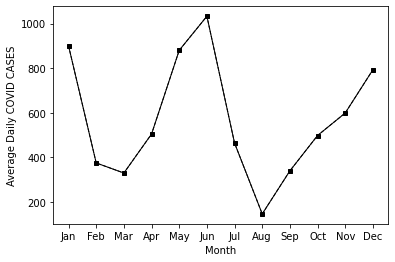

In [61]:
# we can see in the graph that in june covid cases peaked then went on a downward sprial than began to increase once again
# this may have happened due to the lockdowns that were placed 
plt.plot( 'month', 'mean', data=statsm, marker='s', color='black',
markersize=4, linewidth=1, linestyle='--')
plt.plot( 'month', 'mean', data=statsm, marker='o', color='black',
markersize=4, linewidth=1,linestyle='-')
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.show()

In [62]:
df['year'] = pd. DatetimeIndex(df['date']). year
df['year'][0]

2020

In [63]:
statsdcases=df.groupby(['country','year','month']).agg({"dcases":[np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})
statsdcases

dcases 
 
 
 
 
 
 mean 
 std 
 size 
 get_ci_lb 
 get_ci_ub 
 
 
 country 
 year 
 month 
 
 
 
 
 
 
 
 
 
 Afghanistan 
 2020 
 Jan 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 Feb 
 0.833333 
 2.041241 
 6.0 
 -1.308818 
 2.975485 
 
 
 Mar 
 5.258065 
 10.871883 
 31.0 
 1.270225 
 9.245904 
 
 
 Apr 
 55.366667 
 40.385627 
 30.0 
 40.286426 
 70.446908 
 
 
 May 
 430.741935 
 266.692078 
 31.0 
 332.918491 
 528.565379 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 Zimbabwe 
 2021 
 Aug 
 513.322581 
 386.841948 
 31.0 
 371.427809 
 655.217353 
 
 
 Sep 
 201.566667 
 135.119789 
 30.0 
 151.112108 
 252.021225 
 
 
 Oct 
 69.580645 
 58.035492 
 31.0 
 48.293055 
 90.868235 
 
 
 Nov 
 54.933333 
 82.622087 
 30.0 
 24.081739 
 85.784928 
 
 
 Dec 
 2536.548387 
 2572.199964 
 31.0 
 1593.057823 
 3480.038951 
 
 
 
 4488 rows × 5 columns

In [64]:
#filtering the stats to egypt only
statsdcases=statsdcases.reset_index()
statsEgy=statsdcases[(statsdcases['country']=='Egypt') &(statsdcases['year']==2021)]
statsEgy

country 
 year 
 month 
 dcases 
 
 
 
 
 
 
 mean 
 std 
 size 
 get_ci_lb 
 get_ci_ub 
 
 
 
 
 1236 
 Egypt 
 2021 
 Jan 
 899.645161 
 251.335970 
 31.0 
 807.454383 
 991.835939 
 
 
 1237 
 Egypt 
 2021 
 Feb 
 588.321429 
 40.989659 
 28.0 
 572.427298 
 604.215559 
 
 
 1238 
 Egypt 
 2021 
 Mar 
 635.709677 
 36.309038 
 31.0 
 622.391415 
 649.027940 
 
 
 1239 
 Egypt 
 2021 
 Apr 
 847.366667 
 92.416405 
 30.0 
 812.857814 
 881.875520 
 
 
 1240 
 Egypt 
 2021 
 May 
 1132.193548 
 55.087457 
 31.0 
 1111.987306 
 1152.399791 
 
 
 1241 
 Egypt 
 2021 
 Jun 
 621.066667 
 197.770841 
 30.0 
 547.217821 
 694.915513 
 
 
 1242 
 Egypt 
 2021 
 Jul 
 96.129032 
 61.659139 
 31.0 
 73.512277 
 118.745787 
 
 
 1243 
 Egypt 
 2021 
 Aug 
 134.806452 
 73.635326 
 31.0 
 107.796796 
 161.816107 
 
 
 1244 
 Egypt 
 2021 
 Sep 
 536.100000 
 151.276488 
 30.0 
 479.612431 
 592.587569 
 
 
 1245 
 Egypt 
 2021 
 Oct 
 854.612903 
 53.664189 
 31.0 
 834.928720 
 874.297087 
 
 
 1246 
 Egypt 
 2021 
 Nov 
 918.700000 
 248.217528 
 30.0 
 826.014052 
 1011.385948 
 
 
 1247 
 Egypt 
 2021 
 Dec 
 870.870968 
 212.967093 
 31.0 
 792.754007 
 948.987928

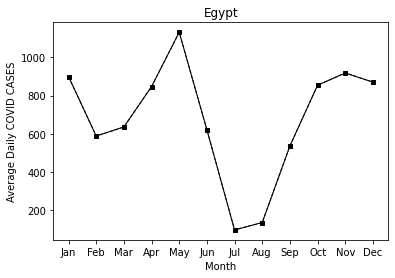

In [65]:
#graph for 2021
statsEgy.columns=['country','year','month','mean','std','size','lb','ub']
plt.plot( 'month', 'mean', data=statsEgy, marker='s', color='black',
markersize=4, linewidth=1, linestyle='--')
plt.plot( 'month', 'mean', data=statsEgy, marker='o', color='black',
markersize=4, linewidth=1,linestyle='-')
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.title("Egypt")
plt.show()


In [66]:
statsEgy20=statsdcases[(statsdcases['country']=='Egypt') & (statsdcases['year']==2020)]
statsEgy20

country 
 year 
 month 
 dcases 
 
 
 
 
 
 
 mean 
 std 
 size 
 get_ci_lb 
 get_ci_ub 
 
 
 
 
 1224 
 Egypt 
 2020 
 Jan 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 1225 
 Egypt 
 2020 
 Feb 
 0.062500 
 0.250000 
 16.0 
 -0.070716 
 0.195716 
 
 
 1226 
 Egypt 
 2020 
 Mar 
 22.870968 
 20.228267 
 31.0 
 15.451179 
 30.290756 
 
 
 1227 
 Egypt 
 2020 
 Apr 
 160.900000 
 54.996144 
 30.0 
 140.364102 
 181.435898 
 
 
 1228 
 Egypt 
 2020 
 May 
 627.354839 
 330.723908 
 31.0 
 506.044330 
 748.665347 
 
 
 1229 
 Egypt 
 2020 
 Jun 
 1444.200000 
 176.114853 
 30.0 
 1378.437633 
 1509.962367 
 
 
 1230 
 Egypt 
 2020 
 Jul 
 831.193548 
 326.183427 
 31.0 
 711.548501 
 950.838595 
 
 
 1231 
 Egypt 
 2020 
 Aug 
 156.806452 
 42.607839 
 31.0 
 141.177770 
 172.435133 
 
 
 1232 
 Egypt 
 2020 
 Sep 
 141.966667 
 23.389481 
 30.0 
 133.232891 
 150.700442 
 
 
 1233 
 Egypt 
 2020 
 Oct 
 140.548387 
 24.650678 
 31.0 
 131.506445 
 149.590329 
 
 
 1234 
 Egypt 
 2020 
 Nov 
 278.533333 
 71.137426 
 30.0 
 251.970182 
 305.096485 
 
 
 1235 
 Egypt 
 2020 
 Dec 
 714.548387 
 354.179036 
 31.0 
 584.634468 
 844.462306

In [67]:
statsEgy20.columns=['country','year','month','mean','std','size','lb','ub']
statsEgy.columns=['country','year','month','mean','std','size','lb','ub']
x=statsEgy20['month']
x

In [68]:
y1=statsEgy20['mean']
y1

In [69]:
y2=statsEgy['mean']
y2

In [70]:
ci_lb_ub20=[statsEgy20['lb'],statsEgy20['ub']]
err20 = np.abs(ci_lb_ub20 - statsEgy20['mean'].to_numpy())
ci_lb_ub21=[statsEgy['lb'],statsEgy['ub']]
err21 = np.abs(ci_lb_ub21 - statsEgy['mean'].to_numpy())

/opt/python/envs/default/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/opt/python/envs/default/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


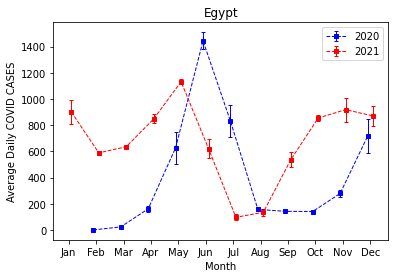

In [71]:
fig, ax = plt.subplots()
trans1 = Affine2D().translate(-0.1, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.1, 0.0) + ax.transData
plt.errorbar('month', 'mean', yerr=err20, data=statsEgy20,marker='s',
capsize=2,
color='blue', markersize=4, linewidth=1,
linestyle='--',transform=trans1)
plt.errorbar('month', 'mean', yerr=err21, data=statsEgy,marker='s',
capsize=2,
 color='red', markersize=4, linewidth=1,
linestyle='--',transform=trans2)
plt.legend(['2020','2021'])
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.title("Egypt")
plt.show()

In [72]:
# we can see in 2020 Egypt peaked earlier than the world
#in 2021 covid cases peake in may but then continoued to decrease until it reached a low in july
#but after the low in july 2021 it started increasing rapidly and began to level off at 800 cases
# the trend in 2021 is more bullish than in 2020

In [73]:
#did the same thing with the UK
statsUK21=statsdcases[(statsdcases['country']=='United Kingdom') &(statsdcases['year']==2021)]
statsUK21

country 
 year 
 month 
 dcases 
 
 
 
 
 
 
 mean 
 std 
 size 
 get_ci_lb 
 get_ci_ub 
 
 
 
 
 4260 
 United Kingdom 
 2021 
 Jan 
 42965.935484 
 13914.484190 
 31.0 
 37862.061478 
 48069.809490 
 
 
 4261 
 United Kingdom 
 2021 
 Feb 
 12881.857143 
 3890.172335 
 28.0 
 11373.405786 
 14390.308500 
 
 
 4262 
 United Kingdom 
 2021 
 Mar 
 5521.161290 
 823.915736 
 31.0 
 5218.946559 
 5823.376022 
 
 
 4263 
 United Kingdom 
 2021 
 Apr 
 2568.433333 
 760.599704 
 30.0 
 2284.420736 
 2852.445930 
 
 
 4264 
 United Kingdom 
 2021 
 May 
 2366.000000 
 702.538303 
 31.0 
 2108.306870 
 2623.693130 
 
 
 4265 
 United Kingdom 
 2021 
 Jun 
 10467.200000 
 5703.039265 
 30.0 
 8337.650140 
 12596.749860 
 
 
 4266 
 United Kingdom 
 2021 
 Jul 
 34392.451613 
 8829.384908 
 31.0 
 31153.807082 
 37631.096144 
 
 
 4267 
 United Kingdom 
 2021 
 Aug 
 30255.064516 
 4435.583110 
 31.0 
 28628.079496 
 31882.049536 
 
 
 4268 
 United Kingdom 
 2021 
 Sep 
 34084.566667 
 4124.159364 
 30.0 
 32544.580251 
 35624.553082 
 
 
 4269 
 United Kingdom 
 2021 
 Oct 
 40538.000000 
 5581.618965 
 31.0 
 38490.645635 
 42585.354365 
 
 
 4270 
 United Kingdom 
 2021 
 Nov 
 39497.000000 
 4990.472302 
 30.0 
 37633.527017 
 41360.472983 
 
 
 4271 
 United Kingdom 
 2021 
 Dec 
 87916.451613 
 43936.704948 
 31.0 
 71800.338127 
 104032.565099

In [74]:
statsUK20=statsdcases[(statsdcases['country']=='United Kingdom') &(statsdcases['year']==2020)]
statsUK20

country 
 year 
 month 
 dcases 
 
 
 
 
 
 
 mean 
 std 
 size 
 get_ci_lb 
 get_ci_ub 
 
 
 
 
 4248 
 United Kingdom 
 2020 
 Jan 
 2.000000 
 NaN 
 1.0 
 NaN 
 NaN 
 
 
 4249 
 United Kingdom 
 2020 
 Feb 
 2.034483 
 2.783661 
 29.0 
 0.975635 
 3.093331 
 
 
 4250 
 United Kingdom 
 2020 
 Mar 
 1249.258065 
 1356.684143 
 31.0 
 751.622303 
 1746.893826 
 
 
 4251 
 United Kingdom 
 2020 
 Apr 
 4665.900000 
 623.577684 
 30.0 
 4433.052266 
 4898.747734 
 
 
 4252 
 United Kingdom 
 2020 
 May 
 2540.967742 
 920.761007 
 31.0 
 2203.229878 
 2878.705606 
 
 
 4253 
 United Kingdom 
 2020 
 Jun 
 922.600000 
 276.439006 
 30.0 
 819.375979 
 1025.824021 
 
 
 4254 
 United Kingdom 
 2020 
 Jul 
 631.483871 
 229.811933 
 31.0 
 547.188173 
 715.779569 
 
 
 4255 
 United Kingdom 
 2020 
 Aug 
 1073.774194 
 253.454889 
 31.0 
 980.806190 
 1166.742197 
 
 
 4256 
 United Kingdom 
 2020 
 Sep 
 3925.700000 
 1724.890464 
 30.0 
 3281.615315 
 4569.784685 
 
 
 4257 
 United Kingdom 
 2020 
 Oct 
 18030.354839 
 4917.879276 
 31.0 
 16226.462157 
 19834.247521 
 
 
 4258 
 United Kingdom 
 2020 
 Nov 
 20629.700000 
 4845.261583 
 30.0 
 18820.449591 
 22438.950409 
 
 
 4259 
 United Kingdom 
 2020 
 Dec 
 27822.838710 
 12272.760027 
 31.0 
 23321.153988 
 32324.523431

In [75]:
statsUK21.columns=['country','year','month','mean','std','size','lb','ub']
statsUK20.columns=['country','year','month','mean','std','size','lb','ub']
x=statsUK21['month']
x

In [76]:
y1=statsUK21['mean']
y1

In [77]:
y2=statsUK20['mean']
y2

In [78]:
ci_lb_ub20=[statsUK20['lb'],statsUK20['ub']]
err20 = np.abs(ci_lb_ub20 - statsUK20['mean'].to_numpy())
ci_lb_ub21=[statsUK21['lb'],statsUK21['ub']]
err21 = np.abs(ci_lb_ub21 - statsUK21['mean'].to_numpy())

/opt/python/envs/default/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/opt/python/envs/default/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


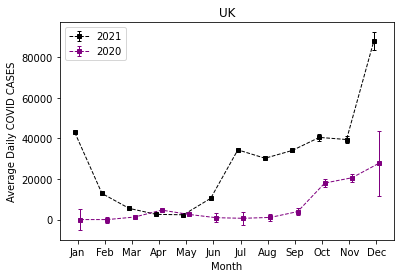

In [79]:
fig, ax = plt.subplots()
trans1 = Affine2D().translate(-0.1, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.1, 0.0) + ax.transData
plt.errorbar('month', 'mean', yerr=err20, data=statsUK21,marker='s',
capsize=2,
color='black', markersize=4, linewidth=1,
linestyle='--',transform=trans1)
plt.errorbar('month', 'mean', yerr=err21, data=statsUK20,marker='s',
capsize=2,
 color='purple', markersize=4, linewidth=1,
linestyle='--',transform=trans2)
plt.legend(['2021','2020'])
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.title("UK")
plt.show()

In [80]:
# very low cases in 2020 that may be because of the hash lockdowns that were placed in the UK
# at the end of 2020 the cases started to steadily increase but then decreased at the start of 2021
# after may 2021, covid cases have been steadily increasing, ending the year at more than 8k+ cases daily
# at the peak, the Uk has almost 6 times more covid cases than in egypt while it population is half's egypt

In [81]:
statsCH21=statsdcases[(statsdcases['country']=='China') &(statsdcases['year']==2021)]
statsCH21

country 
 year 
 month 
 dcases 
 
 
 
 
 
 
 mean 
 std 
 size 
 get_ci_lb 
 get_ci_ub 
 
 
 
 
 852 
 China 
 2021 
 Jan 
 132.258065 
 47.685055 
 31.0 
 114.767045 
 149.749084 
 
 
 853 
 China 
 2021 
 Feb 
 32.214286 
 12.329901 
 28.0 
 27.433249 
 36.995322 
 
 
 854 
 China 
 2021 
 Mar 
 24.741935 
 11.735893 
 31.0 
 20.437175 
 29.046696 
 
 
 855 
 China 
 2021 
 Apr 
 25.400000 
 9.197451 
 30.0 
 21.965615 
 28.834385 
 
 
 856 
 China 
 2021 
 May 
 16.774194 
 5.678672 
 31.0 
 14.691240 
 18.857147 
 
 
 857 
 China 
 2021 
 Jun 
 25.166667 
 6.853559 
 30.0 
 22.607506 
 27.725827 
 
 
 858 
 China 
 2021 
 Jul 
 41.354839 
 24.537792 
 31.0 
 32.354304 
 50.355373 
 
 
 859 
 China 
 2021 
 Aug 
 65.258065 
 37.653657 
 31.0 
 51.446592 
 79.069537 
 
 
 860 
 China 
 2021 
 Sep 
 45.900000 
 19.972999 
 30.0 
 38.441960 
 53.358040 
 
 
 861 
 China 
 2021 
 Oct 
 39.225806 
 20.926394 
 31.0 
 31.549943 
 46.901670 
 
 
 862 
 China 
 2021 
 Nov 
 55.700000 
 30.655089 
 30.0 
 44.253202 
 67.146798 
 
 
 863 
 China 
 2021 
 Dec 
 119.516129 
 69.743755 
 31.0 
 93.933913 
 145.098345

In [82]:
statsCH20=statsdcases[(statsdcases['country']=='China') &(statsdcases['year']==2020)]
statsCH20

country 
 year 
 month 
 dcases 
 
 
 
 
 
 
 mean 
 std 
 size 
 get_ci_lb 
 get_ci_ub 
 
 
 
 
 840 
 China 
 2020 
 Jan 
 980.200000 
 839.605966 
 10.0 
 379.582074 
 1580.817926 
 
 
 841 
 China 
 2020 
 Feb 
 2398.413793 
 2920.163578 
 29.0 
 1287.642973 
 3509.184613 
 
 
 842 
 China 
 2020 
 Mar 
 93.193548 
 101.152499 
 31.0 
 56.090512 
 130.296584 
 
 
 843 
 China 
 2020 
 Apr 
 57.033333 
 65.467804 
 30.0 
 32.587254 
 81.479413 
 
 
 844 
 China 
 2020 
 May 
 6.129032 
 5.487816 
 31.0 
 4.116085 
 8.141980 
 
 
 845 
 China 
 2020 
 Jun 
 21.333333 
 17.703172 
 30.0 
 14.722860 
 27.943806 
 
 
 846 
 China 
 2020 
 Jul 
 92.580645 
 75.651294 
 31.0 
 64.831527 
 120.329764 
 
 
 847 
 China 
 2020 
 Aug 
 72.870968 
 43.574260 
 31.0 
 56.887800 
 88.854135 
 
 
 848 
 China 
 2020 
 Sep 
 21.033333 
 7.517719 
 30.0 
 18.226171 
 23.840496 
 
 
 849 
 China 
 2020 
 Oct 
 26.483871 
 9.323343 
 31.0 
 23.064041 
 29.903701 
 
 
 850 
 China 
 2020 
 Nov 
 51.200000 
 32.512491 
 30.0 
 39.059636 
 63.340364 
 
 
 851 
 China 
 2020 
 Dec 
 98.741935 
 16.719186 
 31.0 
 92.609289 
 104.874582

In [83]:
statsCH21.columns=['country','year','month','mean','std','size','lb','ub']
statsCH20.columns=['country','year','month','mean','std','size','lb','ub']
x=statsCH21['month']
x

In [84]:
y1=statsCH21['mean']
y1

In [85]:
y2=statsCH20['mean']
y2

In [86]:
ci_lb_ub20=[statsCH20['lb'],statsCH20['ub']]
err20 = np.abs(ci_lb_ub20 - statsCH20['mean'].to_numpy())
ci_lb_ub21=[statsCH21['lb'],statsCH21['ub']]
err21 = np.abs(ci_lb_ub21 - statsCH21['mean'].to_numpy())

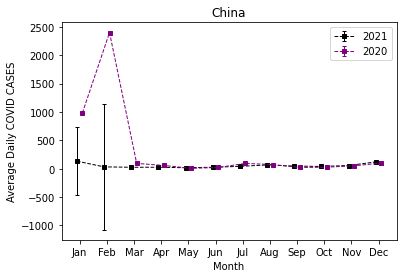

In [87]:
fig, ax = plt.subplots()
trans1 = Affine2D().translate(-0.1, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.1, 0.0) + ax.transData
plt.errorbar('month', 'mean', yerr=err20, data=statsCH21,marker='s',
capsize=2,
color='black', markersize=4, linewidth=1,
linestyle='--',transform=trans1)
plt.errorbar('month', 'mean', yerr=err21, data=statsCH20,marker='s',
capsize=2,
 color='purple', markersize=4, linewidth=1,
linestyle='--',transform=trans2)
plt.legend(['2021','2020'])
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.title("China")
plt.show()

In [88]:
#Data in china look unreliable
# the number of cases were 2,500 then went down to nearly 0 and becames steady for the rest of the year and the next one
# i think the data is not accurate as it is very unlikely with the popluation size of china to control covid for so long

In [89]:
# in the end i think that covid cases are so high in the UK compared to egypt and china as the UK consistently does tests
# while poorer countries do not have the resources to make tests for all its citzens